In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 거리 계산
import math

# 데이터 전처리
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

# 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# 성능평가
from sklearn.model_selection import cross_val_score

# 데이터 가져오기

In [2]:
df_train = pd.read_csv('229255_bus_riders_at_rush_hour_data/train.csv')

# 데이터 훓어보기

In [3]:
df_train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [5]:
df_train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


## 히스토그램

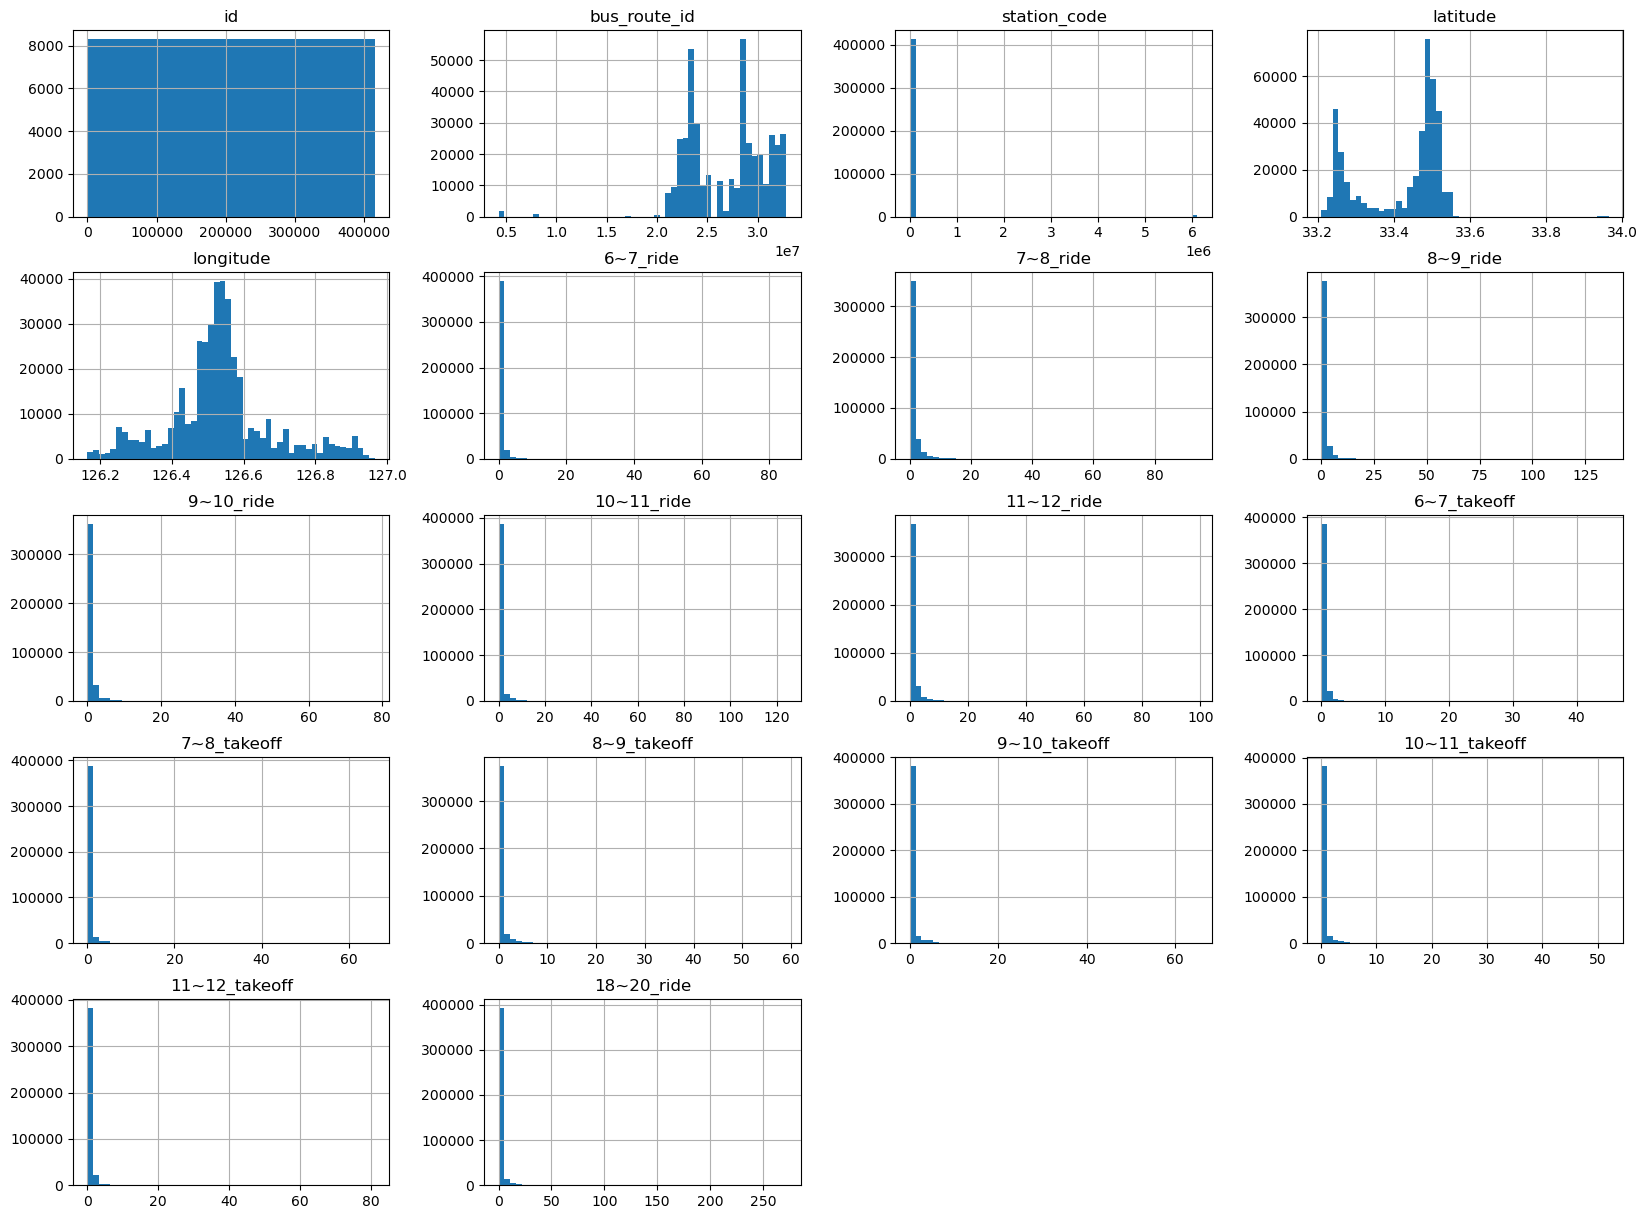

In [6]:
df_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [110]:
df_train['8~9_ride'].value_counts()

0.0     292276
1.0      58592
2.0      25365
3.0      13484
4.0       7818
         ...  
97.0         1
73.0         1
76.0         1
86.0         1
84.0         1
Name: 8~9_ride, Length: 78, dtype: int64

In [109]:
df_train['7~8_ride'].value_counts()

0.0     290208
1.0      58581
2.0      25622
3.0      13684
4.0       8288
         ...  
81.0         1
94.0         1
62.0         1
74.0         1
65.0         1
Name: 7~8_ride, Length: 80, dtype: int64

## 막대 그래프

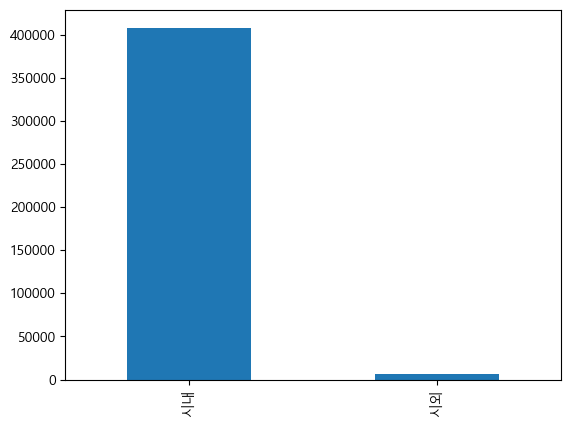

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트가 깨져서 추가
df_train['in_out'].value_counts().plot.bar()
plt.show()

## 지리적 분석결과

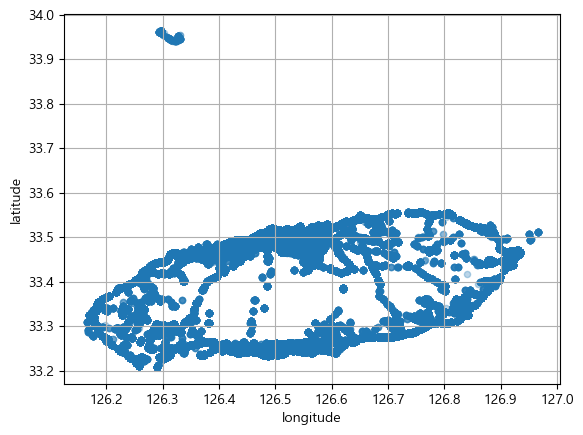

In [8]:
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, grid=True)
plt.show()

In [4]:
# 승차 인원의 합
temp_ride = df_train['6~7_ride'] + df_train['7~8_ride'] + df_train['8~9_ride'] + df_train['9~10_ride'] + df_train['10~11_ride'] + df_train['11~12_ride']

#하차 인원의 합
temp_takeoff = df_train['6~7_takeoff'] + df_train['7~8_takeoff'] + df_train['8~9_takeoff'] + df_train['9~10_takeoff'] + df_train['10~11_takeoff'] + df_train['11~12_takeoff']

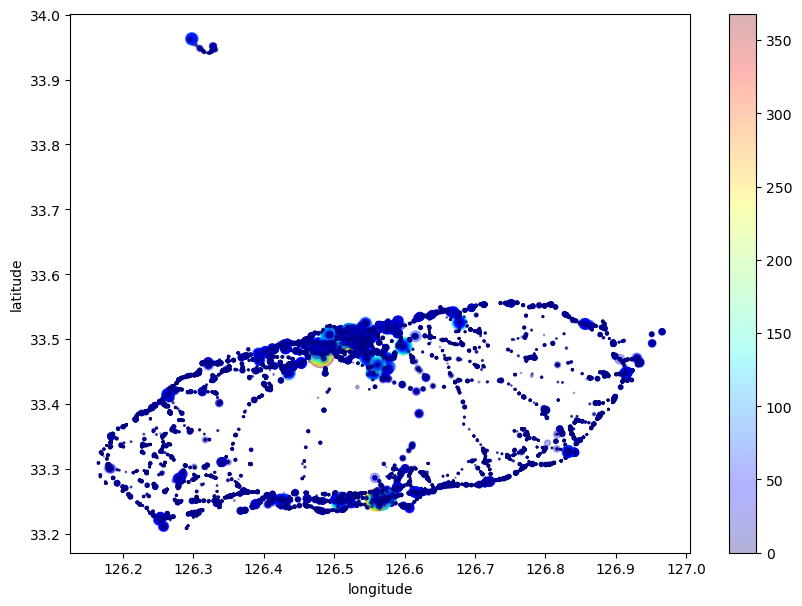

In [5]:
# 승차 인원
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=temp_ride, cmap='jet', figsize=(10, 7), s=temp_ride)
plt.show()

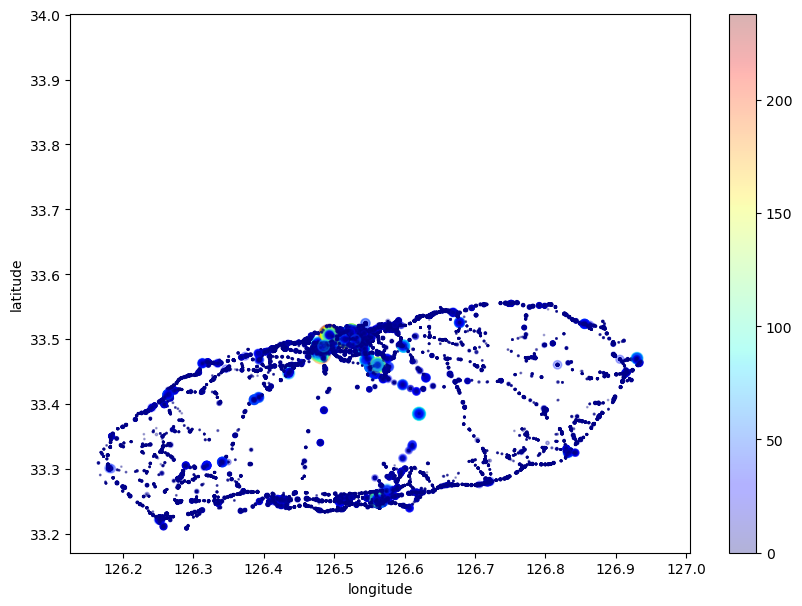

In [6]:
# 하차 인원
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=temp_takeoff, cmap='jet', figsize=(10, 7), s=temp_takeoff)
plt.show()

## 산점도

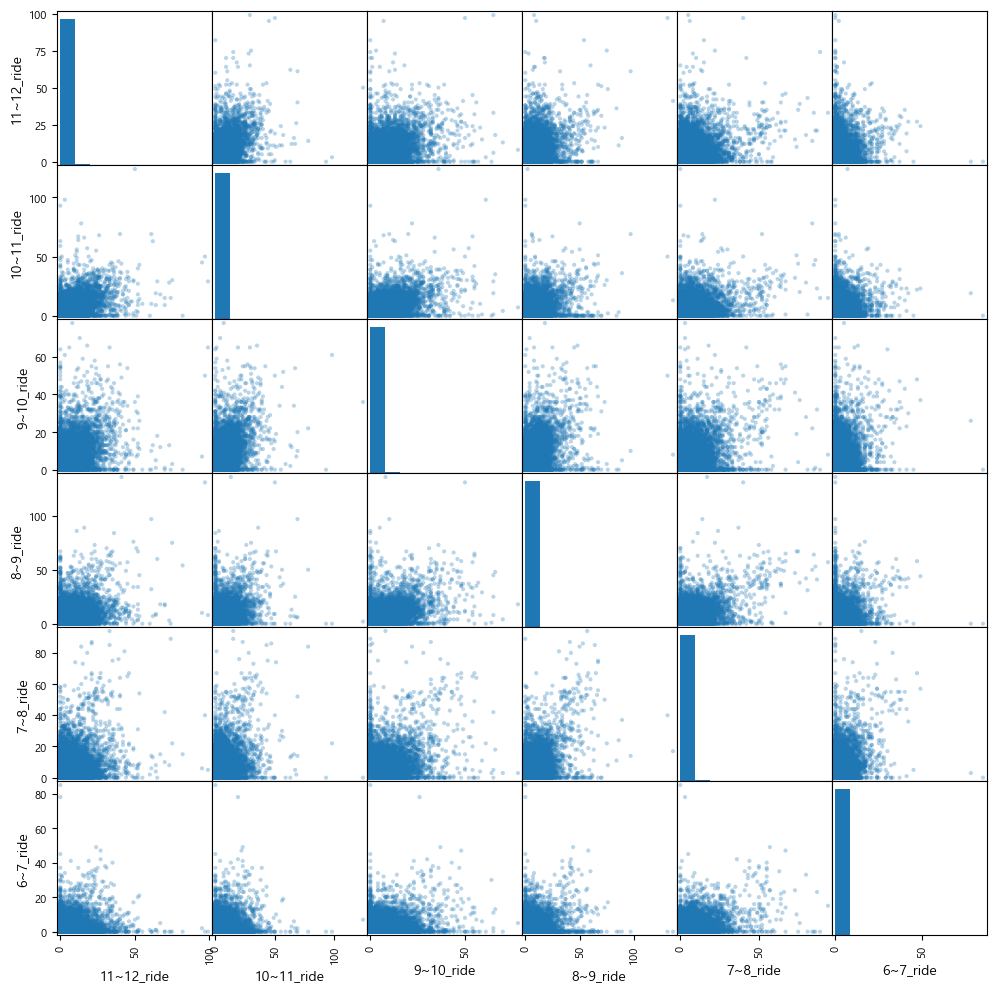

In [12]:
# 승차 인원 산점도
ride_attributes = ['11~12_ride', '10~11_ride', '9~10_ride', '8~9_ride', '7~8_ride', '6~7_ride']

pd.plotting.scatter_matrix(df_train[ride_attributes], figsize=(12, 12), alpha=0.3)
plt.show()

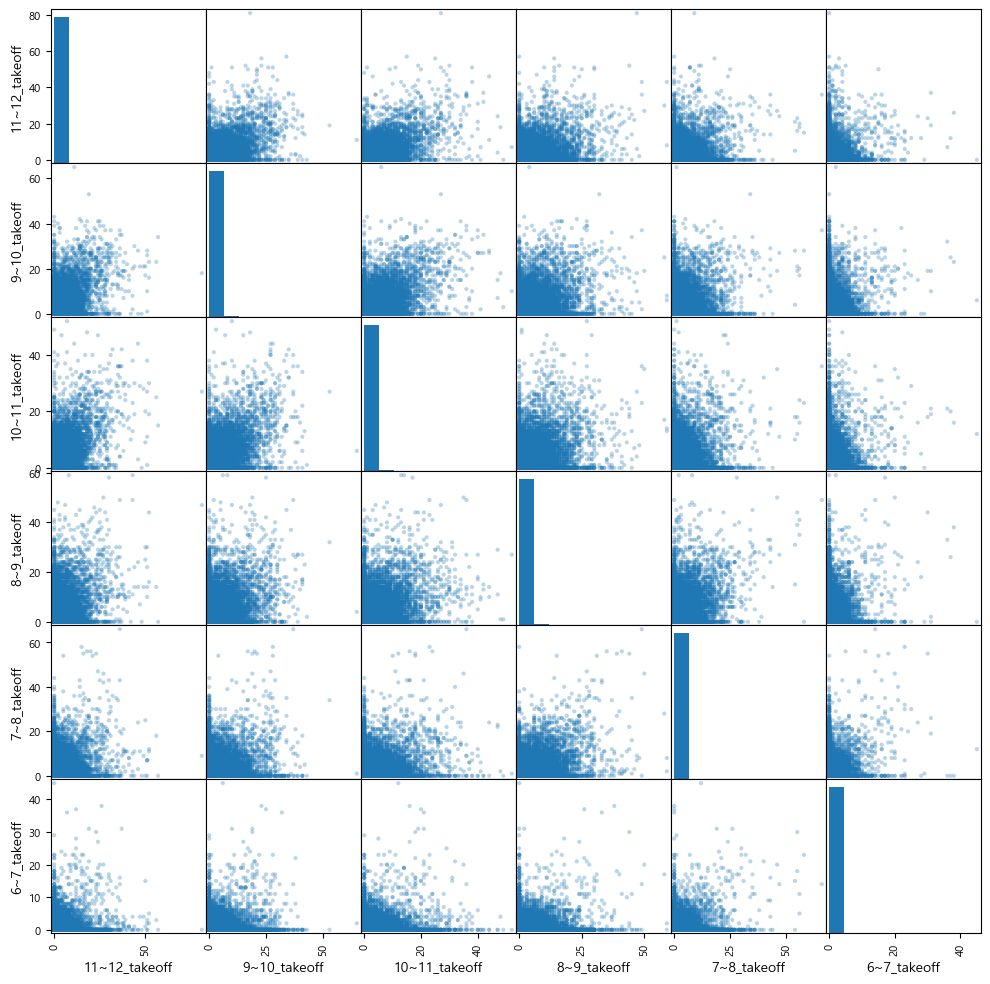

In [13]:
# 하차 인원 산점도
takeoff_attributes = ['11~12_takeoff', '9~10_takeoff', '10~11_takeoff', '8~9_takeoff', '7~8_takeoff', '6~7_takeoff']

pd.plotting.scatter_matrix(df_train[takeoff_attributes], figsize=(12, 12), alpha=0.3)
plt.show()

## 히트맵

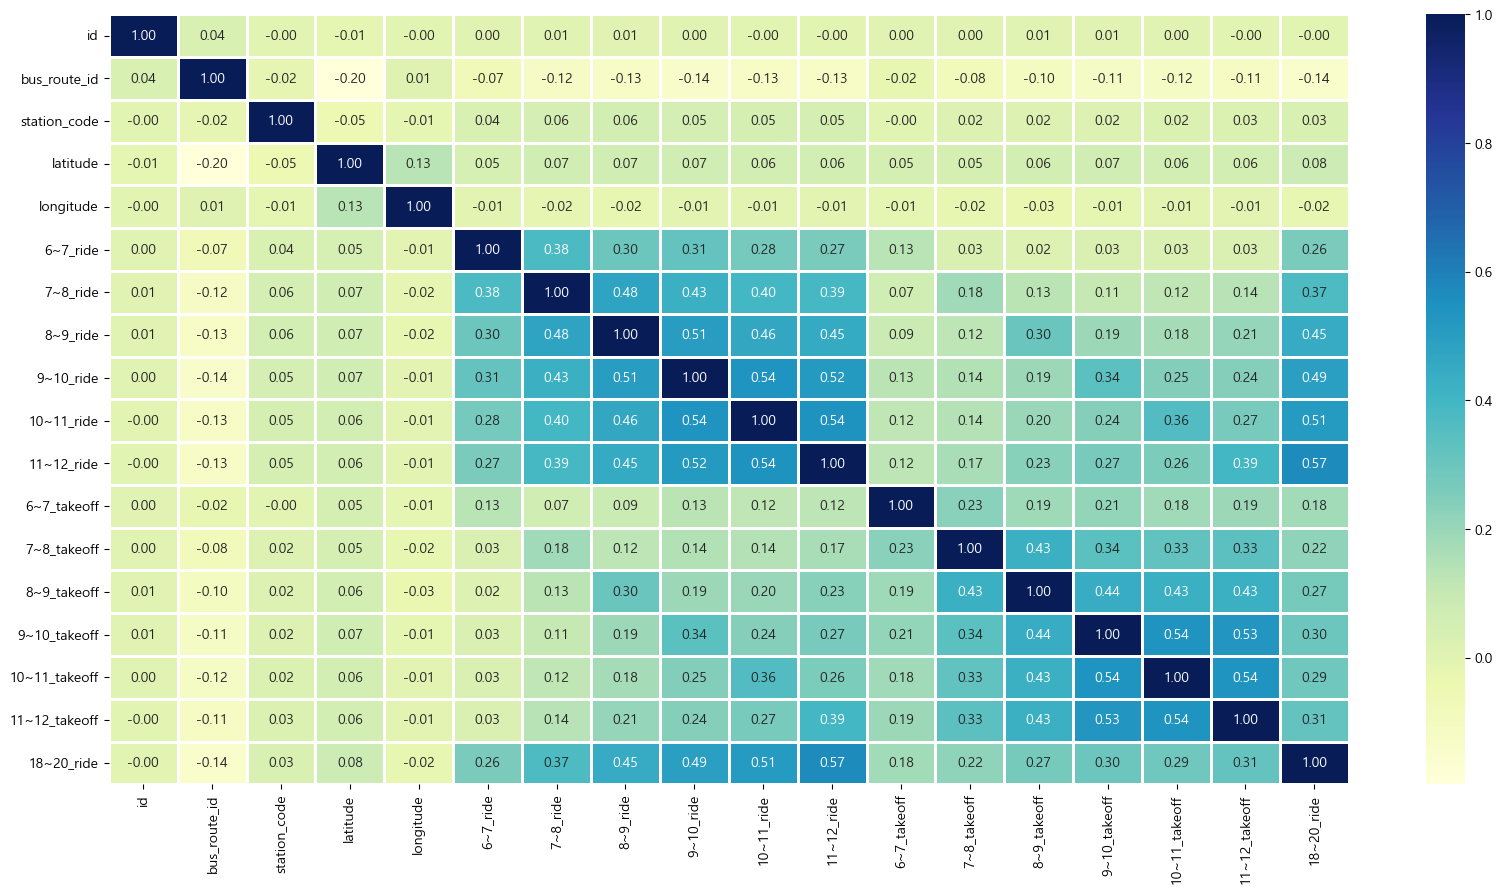

In [14]:
plt.figure(figsize=(20, 10))

sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

## 전체 승하차 인원

In [7]:
# 승차인원 및 하차인원 총계 column 추가
df_train['ride_sum'] = df_train['6~7_ride'] + df_train['7~8_ride'] + df_train['8~9_ride'] + df_train['9~10_ride'] + df_train['10~11_ride'] + df_train['11~12_ride']
df_train['takeoff_sum'] = df_train['6~7_takeoff'] + df_train['7~8_takeoff'] + df_train['8~9_takeoff'] + df_train['9~10_takeoff'] + df_train['10~11_takeoff'] + df_train['11~12_takeoff']

In [8]:
# 상관관계 간단히 보기
df_train.corr()['18~20_ride'].sort_values(ascending=False)

18~20_ride       1.000000
ride_sum         0.621556
11~12_ride       0.569747
10~11_ride       0.512666
9~10_ride        0.494085
8~9_ride         0.445316
takeoff_sum      0.383496
7~8_ride         0.371751
11~12_takeoff    0.313540
9~10_takeoff     0.295875
10~11_takeoff    0.290691
8~9_takeoff      0.274360
6~7_ride         0.262173
7~8_takeoff      0.219430
6~7_takeoff      0.178353
latitude         0.079261
station_code     0.034360
id              -0.000544
longitude       -0.021368
bus_route_id    -0.143702
Name: 18~20_ride, dtype: float64

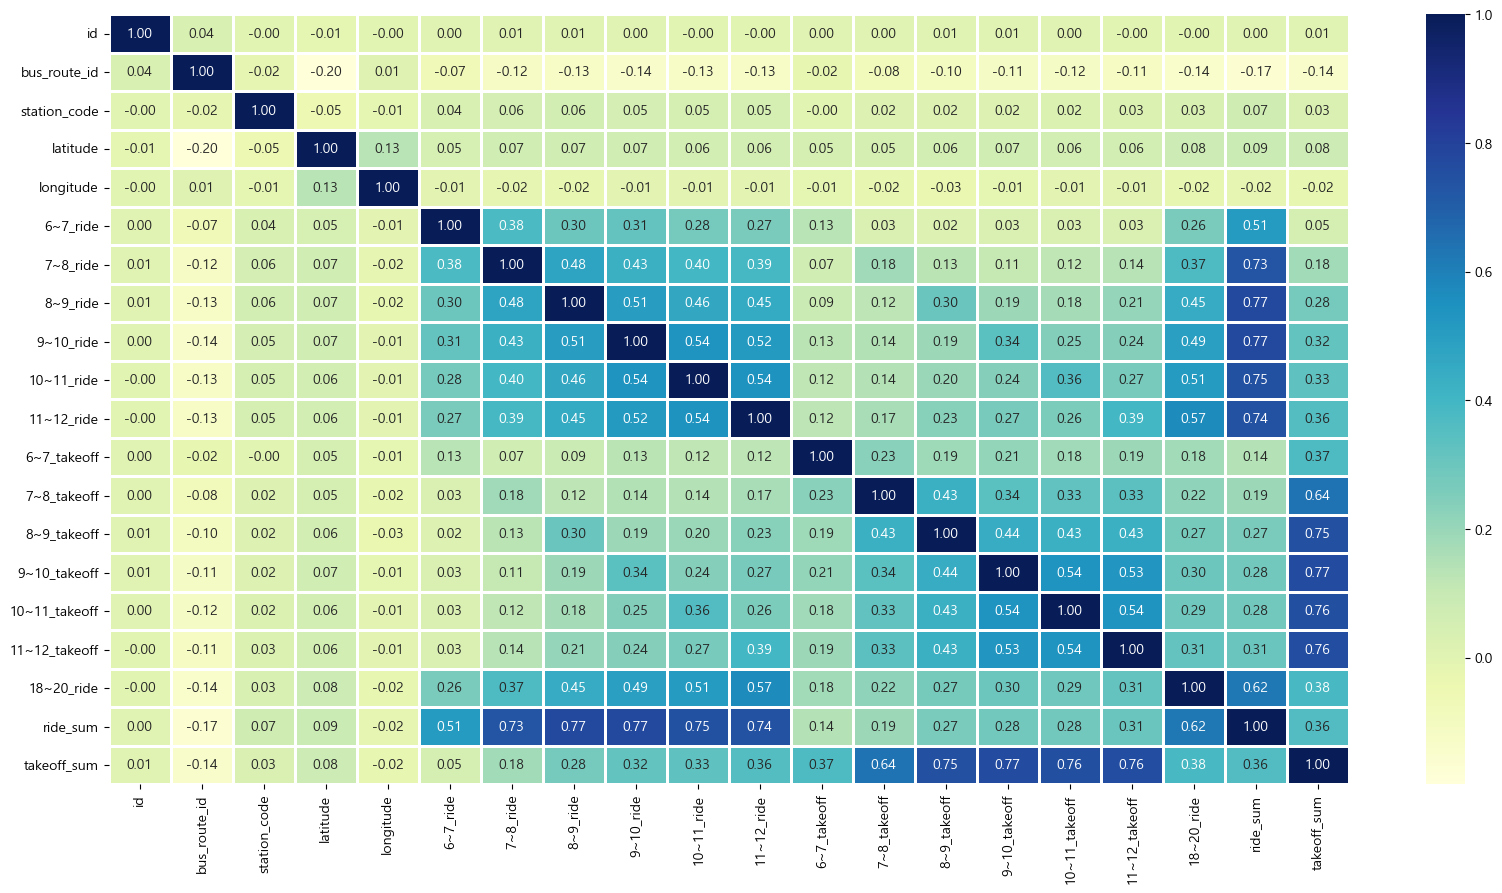

In [76]:
plt.figure(figsize=(20, 10))

sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

## 요일별 탑승자 수

In [9]:
df_train['date'] = pd.to_datetime(df_train['date'])

df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

In [12]:
df_train['weekday'] = df_train['date'].dt.weekday # 0 ~ 6 / 월 ~ 일

mon_sum = df_train[df_train['weekday'] == 0]['ride_sum'].sum()
tue_sum = df_train[df_train['weekday'] == 1]['ride_sum'].sum()
wed_sum = df_train[df_train['weekday'] == 2]['ride_sum'].sum()
thu_sum = df_train[df_train['weekday'] == 3]['ride_sum'].sum()
fri_sum = df_train[df_train['weekday'] == 4]['ride_sum'].sum()
sat_sum = df_train[df_train['weekday'] == 5]['ride_sum'].sum()
sun_sum = df_train[df_train['weekday'] == 6]['ride_sum'].sum()

In [13]:
mon_sum, tue_sum, wed_sum, thu_sum, fri_sum, sat_sum, sun_sum

(322173.0, 268168.0, 255937.0, 232038.0, 213170.0, 133743.0, 141924.0)

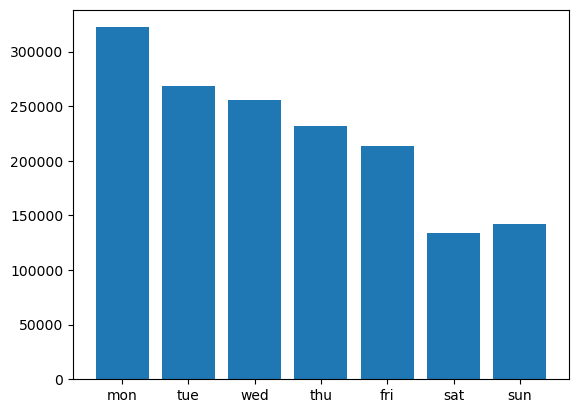

In [14]:
days_name = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
days_sum = [mon_sum, tue_sum, wed_sum, thu_sum, fri_sum, sat_sum, sun_sum]

plt.bar(days_name, days_sum)
plt.show()

In [15]:
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,ride_sum,takeoff_sum,year,month,day,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,16.0,0.0,2019,9,1,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,5.0,22.0,0.0,2019,9,1,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,2.0,4.0,0.0,2019,9,1,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,53.0,79.0,0.0,2019,9,1,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2019,9,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2019,9,30,0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2019,9,30,0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2019,9,30,0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2019,9,30,0


In [16]:
dummies = pd.get_dummies(df_train['weekday'], prefix='weekday')
dummies

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
415418,1,0,0,0,0,0,0
415419,1,0,0,0,0,0,0
415420,1,0,0,0,0,0,0
415421,1,0,0,0,0,0,0


In [17]:
# weekday : label encoding
# weekday_0 ~ weekday_6 : onehotencoding
df_train = pd.concat([df_train, dummies], axis=1)
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,month,day,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,9,1,6,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,9,1,6,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,9,1,6,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,9,1,6,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,9,1,6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,9,30,0,1,0,0,0,0,0,0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,9,30,0,1,0,0,0,0,0,0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,9,30,0,1,0,0,0,0,0,0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,9,30,0,1,0,0,0,0,0,0


## 날짜 데이터 추가

### 각 정류장별 가장 가까운 관측소 추가

In [18]:
jeju=(33.51411, 126.52969)    # 제주 측정소 근처
gosan=(33.29382, 126.16283)   #고산 측정소 근처
seongsan=(33.38677, 126.8802) #성산 측정소 근처
seogwipo=(33.24616, 126.5653) #서귀포 측정소 근처

In [19]:
# 위-경도 정보만 따로 편집
location = list(zip(df_train['latitude'],df_train['longitude'] ))

In [20]:
# 각 정류장에서 측정소까지의 거리가 있음
dis_jeju = [math.sqrt((jeju[0] - i)**2 + (jeju[1] - j)**2) for i, j in location]
dis_gosan = [math.sqrt((gosan[0] - i)**2 + (gosan[1] - j)**2) for i, j in location]
dis_seongsan = [math.sqrt((seongsan[0] - i)**2 + (seongsan[1] - j)**2) for i, j in location]
dis_seogwipo = [math.sqrt((seogwipo[0] - i)**2 + (seogwipo[1] - j)**2) for i, j in location]

df_dis_jeju = pd.DataFrame(dis_jeju, columns=['jeju'])
df_dis_gosan = pd.DataFrame(dis_gosan, columns=['gosan'])
df_dis_seongsan = pd.DataFrame(dis_jeju, columns=['seongsan'])
df_dis_seogwipo = pd.DataFrame(dis_jeju, columns=['seogwipo'])

In [21]:
# 각 측정소 별 거리를 합침, column명은 측정소 이름
dis_total = pd.DataFrame(list(zip( dis_jeju, dis_gosan, dis_seongsan, dis_seogwipo)),columns=['jeju','gosan','seongsan','seogwipo'])
dis_total

,jeju,gosan,seongsan,seogwipo
0,0.043350,0.384633,0.399994,0.254030
1,0.050977,0.376978,0.408241,0.256165
2,0.064795,0.363137,0.417638,0.252892
3,0.038094,0.391942,0.405533,0.269619
4,0.283618,0.252649,0.485598,0.153003
...,...,...,...,...
415418,0.284394,0.156967,0.617457,0.345633
415419,0.020896,0.407632,0.382392,0.258287
415420,0.389126,0.118010,0.636815,0.302950
415421,0.216669,0.231387,0.566900,0.329588


In [22]:
# dis_total에서 행별로 최솟값에 정수 인뎃스 반환
# 제주 0, 고산 1, 성산 2, 서귀포 3
near_index = dis_total.apply(lambda x: x.argmin(), axis=1)
near_index

0         0
1         0
2         0
3         0
4         3
         ..
415418    1
415419    0
415420    1
415421    0
415422    3
Length: 415423, dtype: int64

In [23]:
df_train = pd.concat([df_train, near_index], axis=1)
df_train = df_train.rename(columns={0: '지점명'})
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,day,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,지점명
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,1,6,0,0,0,0,0,0,1,0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,1,6,0,0,0,0,0,0,1,0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,1,6,0,0,0,0,0,0,1,0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,1,6,0,0,0,0,0,0,1,0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1,6,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,30,0,1,0,0,0,0,0,0,1
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,30,0,1,0,0,0,0,0,0,0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,30,0,1,0,0,0,0,0,0,1
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,30,0,1,0,0,0,0,0,0,0


### 가장 가까운 관측소에 맞는 풍향, 강수량, 온도 추가

In [24]:
weather = pd.read_csv('OBS_ASOS_TIM_20230314200606.csv',encoding='cp949')

In [25]:
weather['time'] = [ int( i.split(' ')[1].split(':')[0] ) for i in weather['일시']] 
weather['date'] = [ i.split(' ')[0] for i in weather['일시'] ] 
weather.drop('일시', axis=1, inplace=True)

In [26]:
weather = weather[['date', 'time', '지점명', '기온(°C)', '강수량(mm)', '풍속(m/s)']]

In [27]:
weather.fillna(0.0, inplace=True)

In [28]:
weather = weather[((5 <= weather['time']) & (weather['time'] <= 13)) | ((17 <= weather['time']) & (weather['time'] <= 20))]
weather.reset_index(drop=True, inplace=True)
weather

,date,time,지점명,기온(°C),강수량(mm),풍속(m/s)
0,2019-09-01,5,제주,23.3,0.0,1.2
1,2019-09-01,6,제주,23.4,0.0,1.2
2,2019-09-01,7,제주,23.5,0.0,0.9
3,2019-09-01,8,제주,24.0,0.0,0.7
4,2019-09-01,9,제주,24.9,0.0,1.3
...,...,...,...,...,...,...
3167,2019-10-31,13,서귀포,20.8,0.0,1.6
3168,2019-10-31,17,서귀포,20.0,0.0,0.7
3169,2019-10-31,18,서귀포,18.7,0.0,1.3
3170,2019-10-31,19,서귀포,17.4,0.0,1.3


In [29]:
# 시간별 데이터 날씨정보 분할
weather_5 = weather[weather['time'] == 5]
weather_5.reset_index(drop=True, inplace=True)
weather_6 = weather[weather['time'] == 6]
weather_6.reset_index(drop=True, inplace=True)
weather_7 = weather[weather['time'] == 7]
weather_7.reset_index(drop=True, inplace=True)
weather_8 = weather[weather['time'] == 8]
weather_8.reset_index(drop=True, inplace=True)
weather_9 = weather[weather['time'] == 9]
weather_9.reset_index(drop=True, inplace=True)
weather_10 = weather[weather['time'] == 10]
weather_10.reset_index(drop=True, inplace=True)
weather_11 = weather[weather['time'] == 11]
weather_11.reset_index(drop=True, inplace=True)

weather_12 = weather[weather['time'] == 12]
weather_12.reset_index(drop=True, inplace=True)
weather_13 = weather[weather['time'] == 13]
weather_13.reset_index(drop=True, inplace=True)

weather_17 = weather[weather['time'] == 17]
weather_17.reset_index(drop=True, inplace=True)
weather_18 = weather[weather['time'] == 18]
weather_18.reset_index(drop=True, inplace=True)
weather_19 = weather[weather['time'] == 19]
weather_19.reset_index(drop=True, inplace=True)
weather_20 = weather[weather['time'] == 20]
weather_20.reset_index(drop=True, inplace=True)

In [30]:
weather_5

,date,time,지점명,기온(°C),강수량(mm),풍속(m/s)
0,2019-09-01,5,제주,23.3,0.0,1.2
1,2019-09-02,5,제주,23.6,0.0,3.3
2,2019-09-03,5,제주,22.8,0.0,5.5
3,2019-09-04,5,제주,24.2,0.0,0.8
4,2019-09-05,5,제주,24.3,0.0,2.1
...,...,...,...,...,...,...
239,2019-10-27,5,서귀포,14.1,0.0,1.5
240,2019-10-28,5,서귀포,15.6,0.0,0.5
241,2019-10-29,5,서귀포,16.2,0.0,0.7
242,2019-10-30,5,서귀포,13.3,0.0,1.4


In [31]:
# 날짜별 풍속 및 강수량 저장용 df생성
new_weather = pd.DataFrame(data=weather[['date', '지점명']])
new_weather.drop_duplicates(inplace=True, ignore_index=True)

new_weather

,date,지점명
0,2019-09-01,제주
1,2019-09-02,제주
2,2019-09-03,제주
3,2019-09-04,제주
4,2019-09-05,제주
...,...,...
239,2019-10-27,서귀포
240,2019-10-28,서귀포
241,2019-10-29,서귀포
242,2019-10-30,서귀포


In [32]:
# join을 위한 키 생성
new_weather['date'] = pd.to_datetime(new_weather['date'])

new_weather['month'] = new_weather['date'].dt.month
new_weather['day'] = new_weather['date'].dt.day
new_weather

,date,지점명,month,day
0,2019-09-01,제주,9,1
1,2019-09-02,제주,9,2
2,2019-09-03,제주,9,3
3,2019-09-04,제주,9,4
4,2019-09-05,제주,9,5
...,...,...,...,...
239,2019-10-27,서귀포,10,27
240,2019-10-28,서귀포,10,28
241,2019-10-29,서귀포,10,29
242,2019-10-30,서귀포,10,30


In [33]:
# 각 구간별 강수량 추가
new_weather['5_8_rain'] = (weather_5['강수량(mm)'] + weather_6['강수량(mm)'] + weather_7['강수량(mm)']) / 3
new_weather['8_10_rain'] = (weather_8['강수량(mm)'] + weather_9['강수량(mm)']) / 2
new_weather['10_12_rain'] = (weather_10['강수량(mm)'] + weather_11['강수량(mm)']) / 2
new_weather['17_20_rain'] = (weather_17['강수량(mm)'] + weather_18['강수량(mm)'] + weather_19['강수량(mm)'] + weather_20['강수량(mm)']) / 4

# 각 구간별 풍향 추가
new_weather['5_8_wind'] = (weather_5['풍속(m/s)'] + weather_6['풍속(m/s)'] + weather_7['풍속(m/s)']) / 3
new_weather['8_10_wind'] = (weather_8['풍속(m/s)'] + weather_9['풍속(m/s)']) / 2
new_weather['10_12_wind'] = (weather_10['풍속(m/s)'] + weather_11['풍속(m/s)']) / 2
new_weather['17_20_wind'] = (weather_17['풍속(m/s)'] + weather_18['풍속(m/s)'] + weather_19['풍속(m/s)'] + weather_20['풍속(m/s)']) / 4

# 각 구간별 기온 추가
new_weather['5_8_temp'] = (weather_5['기온(°C)'] + weather_6['기온(°C)'] + weather_7['기온(°C)']) / 3
new_weather['8_10_temp'] = (weather_8['기온(°C)'] + weather_9['기온(°C)']) / 2
new_weather['10_12_temp'] = (weather_10['기온(°C)'] + weather_11['기온(°C)']) / 2
new_weather['17_20_temp'] = (weather_17['기온(°C)'] + weather_18['기온(°C)'] + weather_19['기온(°C)'] + weather_20['기온(°C)']) / 4

In [34]:
new_weather

,date,지점명,month,day,5_8_rain,8_10_rain,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp
0,2019-09-01,제주,9,1,0.000000,0.00,0.00,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
1,2019-09-02,제주,9,2,0.633333,10.15,0.75,0.000,3.466667,4.65,1.30,1.450,23.400000,22.25,22.85,25.525
2,2019-09-03,제주,9,3,3.166667,1.30,0.15,0.250,2.533333,0.95,1.85,2.550,22.866667,24.15,25.05,24.650
3,2019-09-04,제주,9,4,0.000000,16.70,0.75,0.000,1.133333,1.35,2.20,1.350,24.266667,24.40,24.45,25.700
4,2019-09-05,제주,9,5,0.033333,0.00,0.00,0.550,1.533333,1.05,0.80,2.325,24.033333,26.45,28.00,25.925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019-10-27,서귀포,10,27,0.000000,0.00,0.00,0.000,1.566667,0.90,1.95,0.850,14.133333,16.50,18.05,17.550
240,2019-10-28,서귀포,10,28,0.000000,0.00,0.00,0.000,0.766667,1.00,1.05,0.975,15.466667,16.70,17.65,17.225
241,2019-10-29,서귀포,10,29,0.000000,0.00,0.00,0.000,0.800000,1.00,1.55,1.650,16.366667,17.20,20.10,17.500
242,2019-10-30,서귀포,10,30,0.000000,0.00,0.00,0.000,1.333333,1.10,1.45,1.375,13.400000,15.90,18.20,17.550


In [35]:
# 지점명에 대한 코드 부여
# 제주 0, 고산 1, 성산 2, 서귀포 3
new_weather['지점'] = np.nan

new_weather.loc[new_weather['지점명'] == '제주', '지점'] = 0
new_weather.loc[new_weather['지점명'] == '고산', '지점'] = 1
new_weather.loc[new_weather['지점명'] == '성산', '지점'] = 2
new_weather.loc[new_weather['지점명'] == '서귀포', '지점'] = 3

new_weather

,date,지점명,month,day,5_8_rain,8_10_rain,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp,지점
0,2019-09-01,제주,9,1,0.000000,0.00,0.00,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
1,2019-09-02,제주,9,2,0.633333,10.15,0.75,0.000,3.466667,4.65,1.30,1.450,23.400000,22.25,22.85,25.525,0.0
2,2019-09-03,제주,9,3,3.166667,1.30,0.15,0.250,2.533333,0.95,1.85,2.550,22.866667,24.15,25.05,24.650,0.0
3,2019-09-04,제주,9,4,0.000000,16.70,0.75,0.000,1.133333,1.35,2.20,1.350,24.266667,24.40,24.45,25.700,0.0
4,2019-09-05,제주,9,5,0.033333,0.00,0.00,0.550,1.533333,1.05,0.80,2.325,24.033333,26.45,28.00,25.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019-10-27,서귀포,10,27,0.000000,0.00,0.00,0.000,1.566667,0.90,1.95,0.850,14.133333,16.50,18.05,17.550,3.0
240,2019-10-28,서귀포,10,28,0.000000,0.00,0.00,0.000,0.766667,1.00,1.05,0.975,15.466667,16.70,17.65,17.225,3.0
241,2019-10-29,서귀포,10,29,0.000000,0.00,0.00,0.000,0.800000,1.00,1.55,1.650,16.366667,17.20,20.10,17.500,3.0
242,2019-10-30,서귀포,10,30,0.000000,0.00,0.00,0.000,1.333333,1.10,1.45,1.375,13.400000,15.90,18.20,17.550,3.0


In [36]:
new_weather.drop(['date', '지점명'], axis=1, inplace=True)
new_weather

,month,day,5_8_rain,8_10_rain,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp,지점
0,9,1,0.000000,0.00,0.00,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
1,9,2,0.633333,10.15,0.75,0.000,3.466667,4.65,1.30,1.450,23.400000,22.25,22.85,25.525,0.0
2,9,3,3.166667,1.30,0.15,0.250,2.533333,0.95,1.85,2.550,22.866667,24.15,25.05,24.650,0.0
3,9,4,0.000000,16.70,0.75,0.000,1.133333,1.35,2.20,1.350,24.266667,24.40,24.45,25.700,0.0
4,9,5,0.033333,0.00,0.00,0.550,1.533333,1.05,0.80,2.325,24.033333,26.45,28.00,25.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,10,27,0.000000,0.00,0.00,0.000,1.566667,0.90,1.95,0.850,14.133333,16.50,18.05,17.550,3.0
240,10,28,0.000000,0.00,0.00,0.000,0.766667,1.00,1.05,0.975,15.466667,16.70,17.65,17.225,3.0
241,10,29,0.000000,0.00,0.00,0.000,0.800000,1.00,1.55,1.650,16.366667,17.20,20.10,17.500,3.0
242,10,30,0.000000,0.00,0.00,0.000,1.333333,1.10,1.45,1.375,13.400000,15.90,18.20,17.550,3.0


In [37]:
# df_train에 join

df_train = df_train.merge(new_weather, left_on=['month', 'day', '지점명'], right_on=['month', 'day', '지점'], how='left')
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp,지점
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1.500,1.266667,1.35,1.25,2.400,22.500000,24.00,24.85,21.550,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550,1.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550,1.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750,0.0


In [38]:
df_train.drop(['지점명', '지점'], axis=1, inplace=True)
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,1.500,1.266667,1.35,1.25,2.400,22.500000,24.00,24.85,21.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750


In [105]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
date,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00
bus_route_id,4270000,4270000,4270000,4270000,4270000
in_out,시외,시외,시외,시내,시내
station_code,344,357,432,1579,1646
station_name,제주썬호텔,한라병원,정존마을,제주국제공항(600번),중문관광단지입구
latitude,33.4899,33.48944,33.48181,33.50577,33.25579
longitude,126.49373,126.48508,126.47352,126.49252,126.4126
6~7_ride,0.0,1.0,1.0,0.0,0.0
7~8_ride,1.0,4.0,1.0,17.0,0.0


## 데이터 전처리

In [39]:
# 시내/시외 맵핑
mapping_dict = {'시내': 0, '시외': 1}

df_train['in_out'] = df_train['in_out'].map(mapping_dict)

In [40]:
df_station = df_train[['station_code', 'station_name']]

df_train.drop('station_name', axis=1, inplace=True)

In [41]:
df_train

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp
0,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
1,1,2019-09-01,4270000,1,357,33.48944,126.48508,1.0,4.0,4.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
2,2,2019-09-01,4270000,1,432,33.48181,126.47352,1.0,1.0,0.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
3,3,2019-09-01,4270000,0,1579,33.50577,126.49252,0.0,17.0,6.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
4,4,2019-09-01,4270000,0,1646,33.25579,126.41260,0.0,0.0,0.0,...,0.0,1.500,1.266667,1.35,1.25,2.400,22.500000,24.00,24.85,21.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,33.41437,126.26336,4.0,0.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415419,415419,2019-09-30,32820000,0,1564,33.49946,126.51479,4.0,0.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750
415420,415420,2019-09-30,32820000,0,2322,33.23100,126.26273,0.0,0.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415421,415421,2019-09-30,32820000,0,3291,33.46483,126.31870,1.0,0.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750


In [109]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
date,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00
bus_route_id,4270000,4270000,4270000,4270000,4270000
in_out,1,1,1,0,0
station_code,344,357,432,1579,1646
latitude,33.4899,33.48944,33.48181,33.50577,33.25579
longitude,126.49373,126.48508,126.47352,126.49252,126.4126
6~7_ride,0.0,1.0,1.0,0.0,0.0
7~8_ride,1.0,4.0,1.0,17.0,0.0
8~9_ride,2.0,4.0,0.0,6.0,0.0


In [111]:
df_train

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,5_8_temp,8_10_temp,10_12_temp,17_20_temp,rain_cat5_8,rain_cat8_10,rain_cat10_12,wind_cat5_8,wind_cat8_10,wind_cat10_12
0,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
1,1,2019-09-01,4270000,1,357,33.48944,126.48508,1.0,4.0,4.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
2,2,2019-09-01,4270000,1,432,33.48181,126.47352,1.0,1.0,0.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
3,3,2019-09-01,4270000,0,1579,33.50577,126.49252,0.0,17.0,6.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
4,4,2019-09-01,4270000,0,1646,33.25579,126.41260,0.0,0.0,0.0,...,22.500000,24.00,24.85,21.550,no rain,no rain,no rain,small wind,small wind,small wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,33.41437,126.26336,4.0,0.0,0.0,...,22.400000,23.75,25.45,23.550,no rain,no rain,no rain,medium wind,medium wind,small wind
415419,415419,2019-09-30,32820000,0,1564,33.49946,126.51479,4.0,0.0,0.0,...,22.866667,23.70,25.00,23.750,no rain,no rain,no rain,small wind,small wind,small wind
415420,415420,2019-09-30,32820000,0,2322,33.23100,126.26273,0.0,0.0,0.0,...,22.400000,23.75,25.45,23.550,no rain,no rain,no rain,medium wind,medium wind,small wind
415421,415421,2019-09-30,32820000,0,3291,33.46483,126.31870,1.0,0.0,0.0,...,22.866667,23.70,25.00,23.750,no rain,no rain,no rain,small wind,small wind,small wind


In [42]:
# 강수량을 4구간으로 나눠서 카테고리화 시키기 

bins = [-0.1, 0.0, 5.0, 10.0, 100.0]
labels = ['no rain', 'small rain', 'medium rain', 'heavy rain']

df_train['rain_cat5_8'] = pd.cut(df_train['5_8_rain'],bins=bins, labels=labels)

In [43]:
bins = [-0.1, 0.0, 5.0, 10.0, 100.0]
labels = ['no rain', 'small rain', 'medium rain', 'heavy rain']

df_train['rain_cat8_10'] = pd.cut(df_train['8_10_rain'],bins=bins, labels=labels)

In [44]:
bins = [-0.1, 0.0, 5.0, 10.0, 100.0]
labels = ['no rain', 'small rain', 'medium rain', 'heavy rain']

df_train['rain_cat10_12'] = pd.cut(df_train['10_12_rain'],bins=bins, labels=labels)

In [45]:
weather_cat1 = df_train[['rain_cat5_8','rain_cat8_10','rain_cat10_12']]

In [46]:
# 레이블 인코딩
from sklearn.preprocessing import OrdinalEncoder # LabelEncoder는 1차원 데이터를 기대

ordinal_encoder = OrdinalEncoder()
rb_rain = ordinal_encoder.fit_transform(weather_cat1)


In [47]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
oh_rain = onehot_encoder.fit_transform(weather_cat1)

In [48]:
onehot_encoder.categories_

[array(['heavy rain', 'medium rain', 'no rain', 'small rain'], dtype=object),
 array(['heavy rain', 'medium rain', 'no rain', 'small rain'], dtype=object),
 array(['heavy rain', 'medium rain', 'no rain', 'small rain'], dtype=object)]

In [86]:
# 풍속을 4구간으로 나눠서 카테고리화 시키기 
# 풍속 나눈 기준은 기상청에서 사용하는 '보퍼트풍력계급표' 참고
# 2단계(~3.3), 3-4단계(3.4~7.9), 5-6단계(8.0~13.8), 7단계(13.9~)
bins = [-0.1, 3.3, 7.9, 13.8, 30.0]
labels = ['small wind', 'medium wind', 'big wind', 'very big wind']

df_train['wind_cat5_8'] = pd.cut(df_train['5_8_wind'],bins=bins, labels=labels)

In [87]:
# 풍속을 4구간으로 나눠서 카테고리화 시키기 
bins = [-0.1, 3.3, 7.9, 13.8, 30.0]
labels = ['small wind', 'medium wind', 'big wind', 'very big wind']

df_train['wind_cat8_10'] = pd.cut(df_train['8_10_wind'],bins=bins, labels=labels)

In [88]:
# 풍속을 4구간으로 나눠서 카테고리화 시키기 
bins = [-0.1, 3.3, 7.9, 13.8, 30.0]
labels = ['small wind', 'medium wind', 'big wind', 'very big wind']

df_train['wind_cat10_12'] = pd.cut(df_train['10_12_wind'],bins=bins, labels=labels)

In [83]:
df_train['10_12_wind'].describe()

count    415423.000000
mean          3.258915
std           1.969934
min           0.000000
25%           2.000000
50%           2.800000
75%           4.150000
max          13.500000
Name: 10_12_wind, dtype: float64

In [85]:
df_train['8_10_wind'].describe()

count    415423.000000
mean          2.781250
std           2.043725
min           0.000000
25%           1.300000
50%           2.100000
75%           3.850000
max          15.050000
Name: 8_10_wind, dtype: float64

In [89]:
df_train['5_8_wind'].describe()

count    415423.000000
mean          2.459847
std           2.015452
min           0.000000
25%           1.233333
50%           1.900000
75%           3.133333
max          18.400000
Name: 5_8_wind, dtype: float64

In [90]:
weather_cat2 = df_train[['wind_cat5_8','wind_cat8_10','wind_cat10_12']]

In [91]:
weather_cat2.describe()

,wind_cat5_8,wind_cat8_10,wind_cat10_12
count,415423,415423,415423
unique,4,4,3
top,small wind,small wind,small wind
freq,328055,279847,249593


In [92]:
# 레이블 인코딩
from sklearn.preprocessing import OrdinalEncoder # LabelEncoder는 1차원 데이터를 기대

ordinal_encoder = OrdinalEncoder()
rb_wind = ordinal_encoder.fit_transform(weather_cat2)
rb_wind

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       ...,
       [1., 1., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [93]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
oh_wind = onehot_encoder.fit_transform(weather_cat2)
oh_wind

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [94]:
onehot_encoder.categories_

[array(['big wind', 'medium wind', 'small wind', 'very big wind'],
       dtype=object),
 array(['big wind', 'medium wind', 'small wind', 'very big wind'],
       dtype=object),
 array(['big wind', 'medium wind', 'small wind'], dtype=object)]

In [95]:
weather_cat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415423 entries, 0 to 415422
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   wind_cat5_8    415423 non-null  category
 1   wind_cat8_10   415423 non-null  category
 2   wind_cat10_12  415423 non-null  category
dtypes: category(3)
memory usage: 4.4 MB


In [67]:
df_train

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,5_8_temp,8_10_temp,10_12_temp,17_20_temp,rain_cat5_8,rain_cat8_10,rain_cat10_12,wind_cat5_8,wind_cat8_10,wind_cat10_12
0,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
1,1,2019-09-01,4270000,1,357,33.48944,126.48508,1.0,4.0,4.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
2,2,2019-09-01,4270000,1,432,33.48181,126.47352,1.0,1.0,0.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
3,3,2019-09-01,4270000,0,1579,33.50577,126.49252,0.0,17.0,6.0,...,23.400000,24.45,26.05,21.925,no rain,no rain,no rain,small wind,small wind,small wind
4,4,2019-09-01,4270000,0,1646,33.25579,126.41260,0.0,0.0,0.0,...,22.500000,24.00,24.85,21.550,no rain,no rain,no rain,small wind,small wind,small wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,33.41437,126.26336,4.0,0.0,0.0,...,22.400000,23.75,25.45,23.550,no rain,no rain,no rain,medium wind,medium wind,small wind
415419,415419,2019-09-30,32820000,0,1564,33.49946,126.51479,4.0,0.0,0.0,...,22.866667,23.70,25.00,23.750,no rain,no rain,no rain,small wind,small wind,small wind
415420,415420,2019-09-30,32820000,0,2322,33.23100,126.26273,0.0,0.0,0.0,...,22.400000,23.75,25.45,23.550,no rain,no rain,no rain,medium wind,medium wind,small wind
415421,415421,2019-09-30,32820000,0,3291,33.46483,126.31870,1.0,0.0,0.0,...,22.866667,23.70,25.00,23.750,no rain,no rain,no rain,small wind,small wind,small wind


In [113]:
df_train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'latitude',
       'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride',
       'ride_sum', 'takeoff_sum', 'year', 'month', 'day', 'weekday',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', '5_8_rain', '8_10_rain', '10_12_rain',
       '17_20_rain', '5_8_wind', '8_10_wind', '10_12_wind', '17_20_wind',
       '5_8_temp', '8_10_temp', '10_12_temp', '17_20_temp', 'rain_cat5_8',
       'rain_cat8_10', 'rain_cat10_12', 'wind_cat5_8', 'wind_cat8_10',
       'wind_cat10_12'],
      dtype='object')

In [140]:
train_num

,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,...,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,ride_sum,takeoff_sum,5_8_temp,8_10_temp,10_12_temp,17_20_temp
0,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,0.0,23.400000,24.45,26.05,21.925
1,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,...,0.0,0.0,0.0,5.0,22.0,0.0,23.400000,24.45,26.05,21.925
2,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,0.0,23.400000,24.45,26.05,21.925
3,33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,...,0.0,0.0,0.0,53.0,79.0,0.0,23.400000,24.45,26.05,21.925
4,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,22.500000,24.00,24.85,21.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,22.400000,23.75,25.45,23.550
415419,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,22.866667,23.70,25.00,23.750
415420,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,22.400000,23.75,25.45,23.550
415421,33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,22.866667,23.70,25.00,23.750


In [145]:
# 전처리할 수치형데이터만 
train_num = df_train[['latitude',
       'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', 
       'ride_sum', 'takeoff_sum','5_8_temp', '8_10_temp', '10_12_temp', '17_20_temp']]

In [146]:
# (1) 표준화
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_num_std = std_scaler.fit_transform(train_num)
train_num_std.mean(0), train_num_std.std(0) # 컬럼별로 확인 axis=0

(array([-9.16242192e-14,  4.28009435e-13, -1.40253439e-17,  7.01951357e-17,
         7.25212903e-18,  4.18707827e-17,  9.03095314e-18, -1.45042581e-17,
         4.10497870e-17,  3.49607352e-17, -1.02624467e-18, -1.25886013e-17,
         1.09466099e-18, -1.94302325e-17,  1.86092368e-17, -3.06505076e-17,
         3.32489591e-15, -4.75630199e-16, -2.99937110e-15,  1.62256125e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

In [147]:
# (2) 정규화
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
train_num_mm = min_max_scaler.fit_transform(train_num)
train_num_mm.min(0), train_num_mm.max(0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

In [148]:
# (3) 로그 스케일링 

from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)
log_train = log_transformer.fit_transform(train_num)

In [149]:
# 수치형 데이터 전처리 파이프라인
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([("mm_scaler", MinMaxScaler()),  # 정규화
                        ("log_transfomer", FunctionTransformer(np.log1p)),  # 로그 변환하는 변환기
                        ("std_scaler", StandardScaler())   # 표준화
                              ])

In [150]:
# 강수량 , 풍속 원핫인코딩 -> 파이프라인에 넣어서
from sklearn.compose import ColumnTransformer

cat_attrib = ['rain_cat5_8', 'rain_cat8_10','rain_cat10_12','wind_cat5_8','wind_cat8_10','wind_cat10_12']
num_attrib = train_num.columns

full_pipeline = ColumnTransformer([
                                   ('oh_encoder', OneHotEncoder(), cat_attrib),
                                   ('num', num_pipeline, num_attrib)
                                  ])

In [151]:
X = df_train.drop('18~20_ride', axis=1)
y = df_train['18~20_ride']

In [152]:
X.shape

(415423, 50)

In [153]:
X_prepared = full_pipeline.fit_transform(X)

In [154]:
X_prepared.shape

(415423, 43)

In [155]:
# 강수량, 풍속 원핫인코딩한 버전 : 랜덤포레스트 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf_reg = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_reg, X_prepared, y, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
rf_rmse = np.sqrt(-rf_scores.mean())
rf_rmse

3.0505148946863567